# K - Means

**K-Means** es otro algoritmo no-supervisado para dividir un número de observaciones en determinados grupos.

Ahora no vamos a establecer una clustericación jerárquica ni realizar un dendrograma.

Vamos a dividir los datos en *k* grupos. El problema que tiene *k-means* es que el número de grupos *k* tiene que ser conocido, e incluso el método necesita evaluar, calcular o definir los baricentros, los centro de gravedad ( centroides ) que forman parte de la etapa inicial del modelo.

### Distancia

La distancia intracluster para un cluster $C_j$ cualquiera como:

$$
SS_w (C_j) = \Sigma_{x \in C_j} (x - c_j)^2
$$

También podemos usar la distancia intracluster normalizada para validar la eficacia del modelo.

$$
S\tilde{S}_w (C_j) = \Sigma_{j = 1}^k \frac{SS_w (C_j)}{SS_T} \ donde\ SS_T = \Sigma_{i = 1}^n(x_i - \overline{x})^2
$$

El objetivo de *k-means* es obtener una configuración de centroides del cluster de modo que la suma total de cuadrados siguiente $SS_w$ sea mínima.

$$
SS_w(k) = \Sigma_{j = 1}^k SS_w (C_j) = \Sigma_{j=1}^k\Sigma_{x_i \in C_j} (x_i - c_j)^2
$$

* k : número de clusters
* $x_i$ son los puntos que pertenecen al cluster j-ésimo.
* $C_j$ es el centroide del cluster j-ésimo.

##### k-means en Python

In [1]:
from sklearn import cluster as skcl
from scipy import cluster as scl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn style
sns.set()

##### Datos sintéticos

In [2]:
df = pd.read_csv("../../datasets/wine/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Para una posterior determinación del número de clusters, vamos a visualizar la frecuencia de las distintas categorías en las que se ha clasificado la calidad del vino.

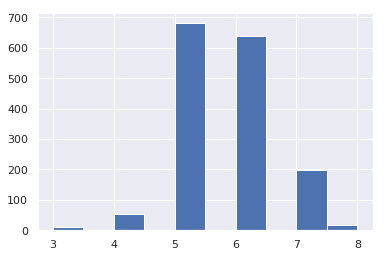

In [3]:
# Calidad
plt.hist(df['quality'])
plt.show()

Ahora podemos observar las distintas medias de cada variable para cada calidad. Así podremos decidir que variables son las que más varían respecto a la clasificación de la calidad.

In [4]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Una vez hemos hecho una pequeña investigación del conjunto de datos, hemos observado que algunas variables tienen saltos de rangos muy grandes.

Para evitar estos saltos de rangos vamos a normalizar los datos.

##### Biblioteca sklearn

In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Instanciamos la clase
sc_X = StandardScaler()

# usamos el método fit para el conjunto de entrenamiento
df_sc = sc_X.fit_transform(df)
df_scaler = pd.DataFrame(df_sc, columns=df.columns)
df_scaler.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


##### Normalización a mano

In [9]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

##### Biblioteca scikit

In [15]:
from sklearn import cluster

In [16]:
clus = cluster.AgglomerativeClustering(n_clusters=6,
                                         linkage='ward',
                                         ).fit(df_norm)

In [18]:
md = pd.Series(clus.labels_)

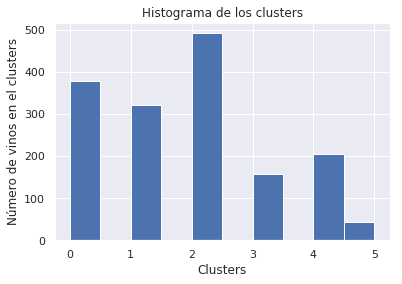

In [13]:
plt.hist(md)
plt.title("Histograma de los clusters")
plt.xlabel("Clusters")
plt.ylabel("Número de vinos en el clusters")
plt.show()